### Life cycle

1. Data Collection

2. Data checks to perform

3. EDA

4. Data preprocessing

5. Model Training

6. Choosing the Best Model

### Importing data and Packages

In [6]:
3+3

6

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv(r'E:\My ML\Ml Project\notebook\data\stud.csv')


In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

### Data Checks to perform
1. Missing Values
2. Duplicates
3. Datatypes
4. Unique Values from each column
5. Statistics of Dataset
6. Different ctegories in different categorical column

In [11]:
# Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
# Check Duplicates
df.duplicated().sum()

0

In [13]:
# Null and Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
# Number unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
# Statistic of the data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
# Exploring Data
print(df['gender'].unique())
print()

print(df['race_ethnicity'].unique())
print()

print(df['parental_level_of_education'].unique())
print()

print(df['lunch'].unique())
print()

print(df['test_preparation_course'].unique())


['female' 'male']

['group B' 'group C' 'group A' 'group D' 'group E']

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

['standard' 'free/reduced']

['none' 'completed']


In [17]:
# Define Numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('we have {} categorical features: {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


### Feature Engineering

Adding Total_score and Avg-score

In [19]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg_score'] = df['Total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Visualization

1. Histogram
2. Kernel Distribution Function

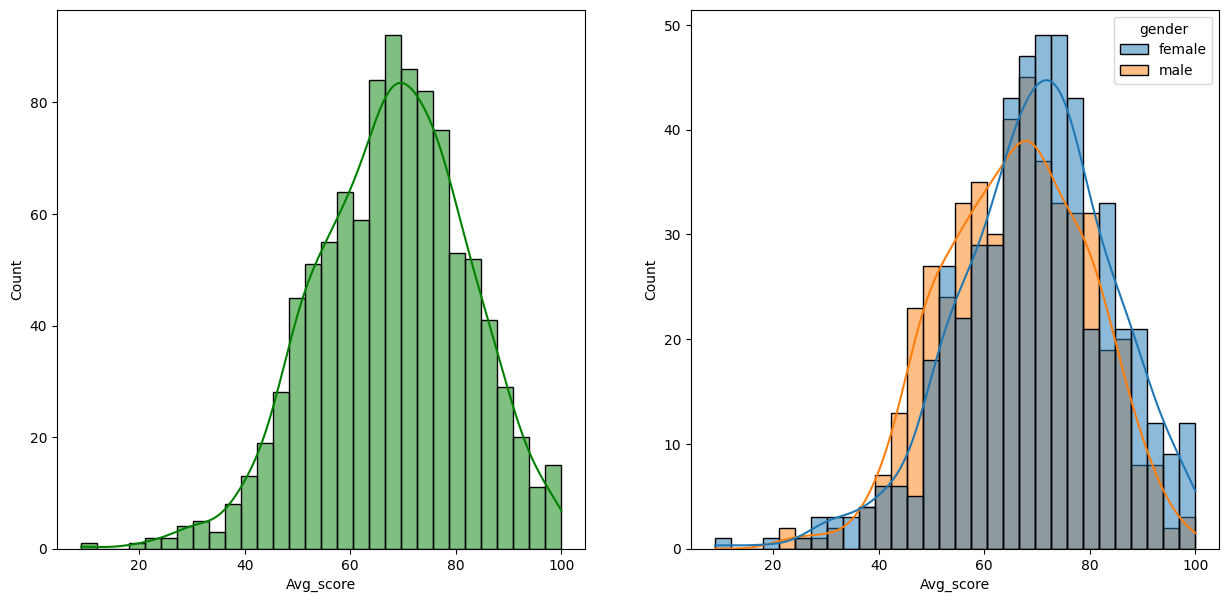

In [20]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=df,x='Avg_score',bins=30, kde=True, color='g',ax=axs[0])
sns.histplot(data=df,x='Avg_score',bins=30, kde=True, hue='gender',ax=axs[1])
plt.show()

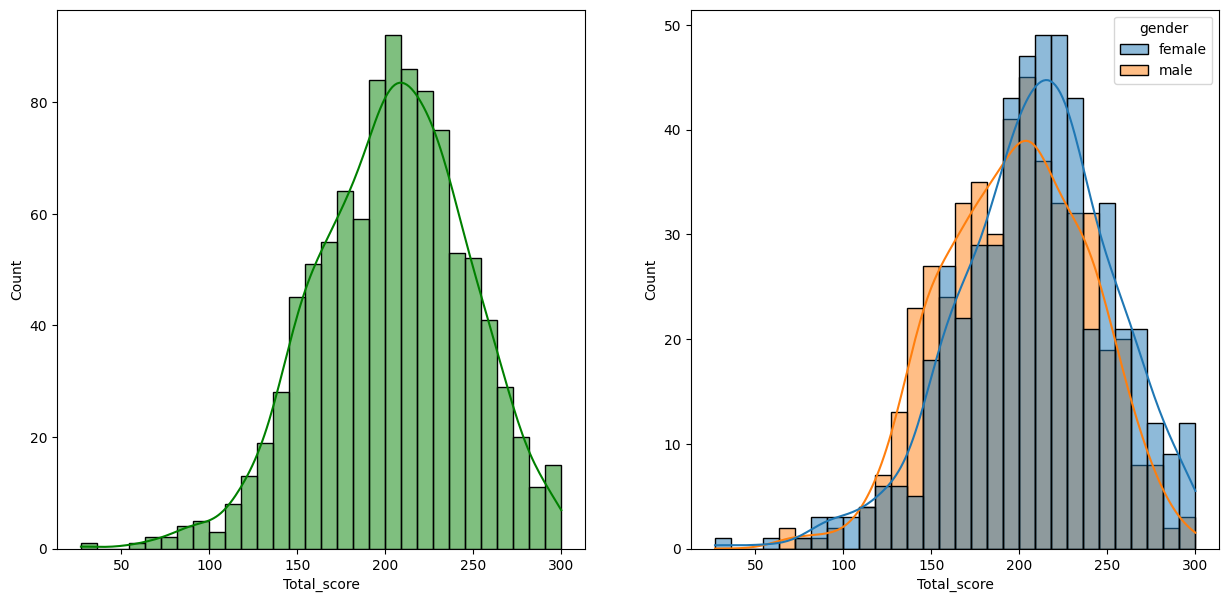

In [21]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=df,x='Total_score',bins=30, kde=True, color='g',ax=axs[0])
sns.histplot(data=df,x='Total_score',bins=30, kde=True, hue='gender',ax=axs[1])
plt.show()

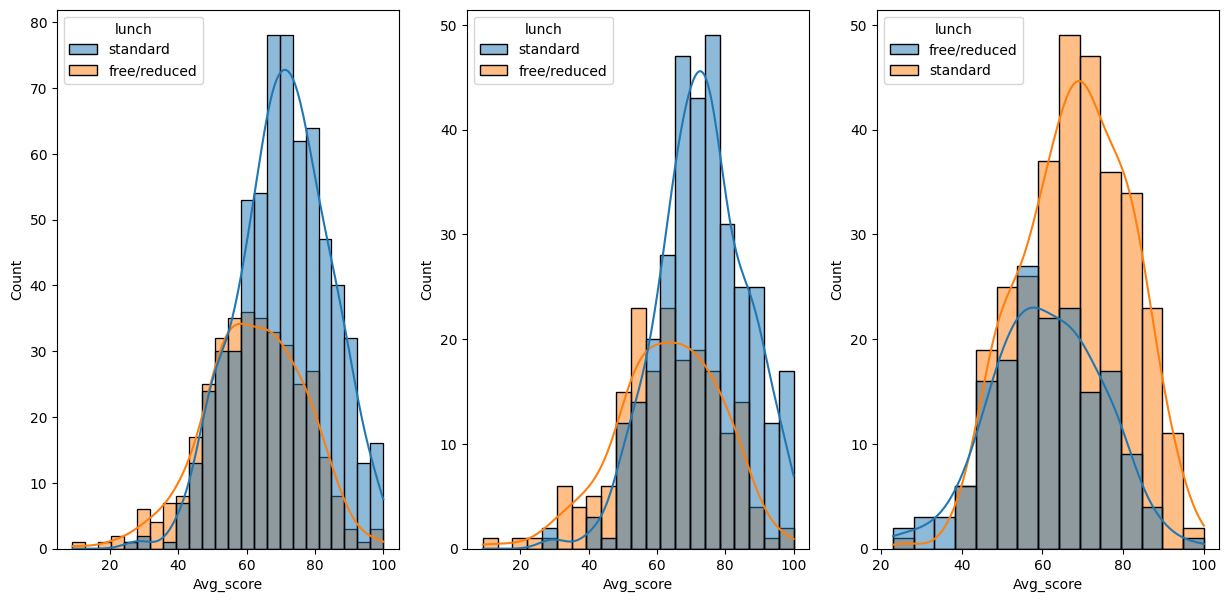

In [22]:
# Create subplots with 1 row and 3 columns
fig, axs= plt.subplots(1,3, figsize=(15,7))
sns.histplot(data=df, x='Avg_score',kde=True,hue='lunch',ax=axs[0])
sns.histplot(data=df[df.gender=='female'],x='Avg_score', kde=True, hue='lunch',ax=axs[1])
sns.histplot(data=df[df.gender=='male'],x='Avg_score', kde=True, hue='lunch',ax=axs[2])
plt.show()

Standard Lunch helps in good results either its male or female

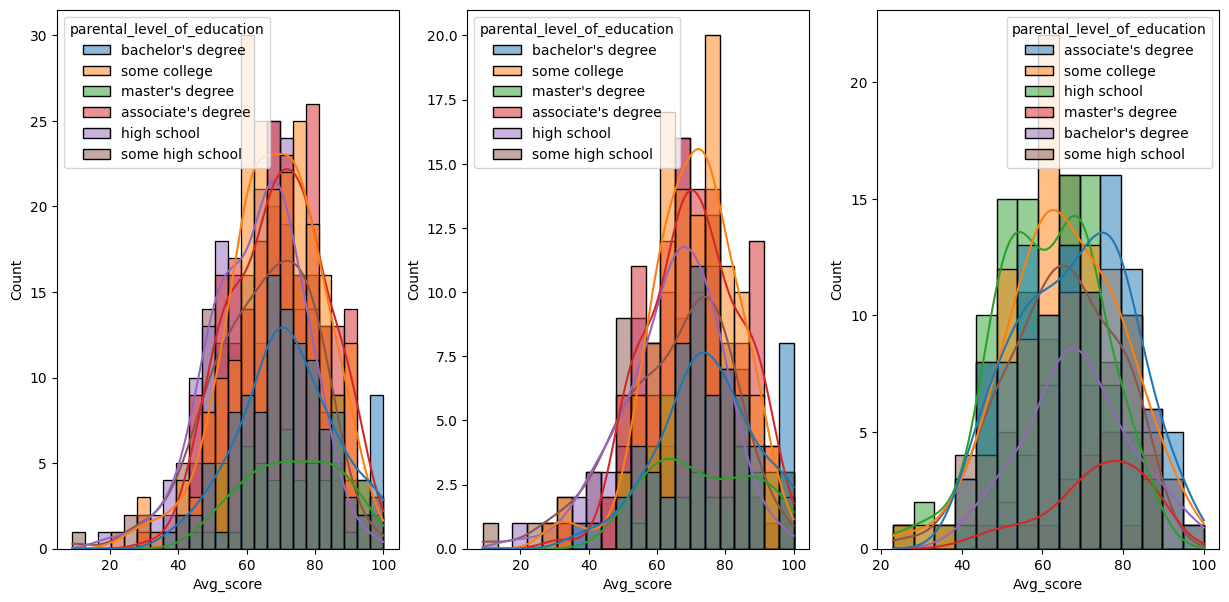

In [23]:
# Create subplots with 1 row and 3 columns
fig, axs= plt.subplots(1,3, figsize=(15,7))
sns.histplot(data=df, x='Avg_score',kde=True,hue='parental_level_of_education',ax=axs[0])
sns.histplot(data=df[df.gender=='female'],x='Avg_score', kde=True, hue='parental_level_of_education',ax=axs[1])
sns.histplot(data=df[df.gender=='male'],x='Avg_score', kde=True, hue='parental_level_of_education',ax=axs[2])
plt.show()

There is no such generelized pattern showing that parent's eduaction help perform students well in exams.

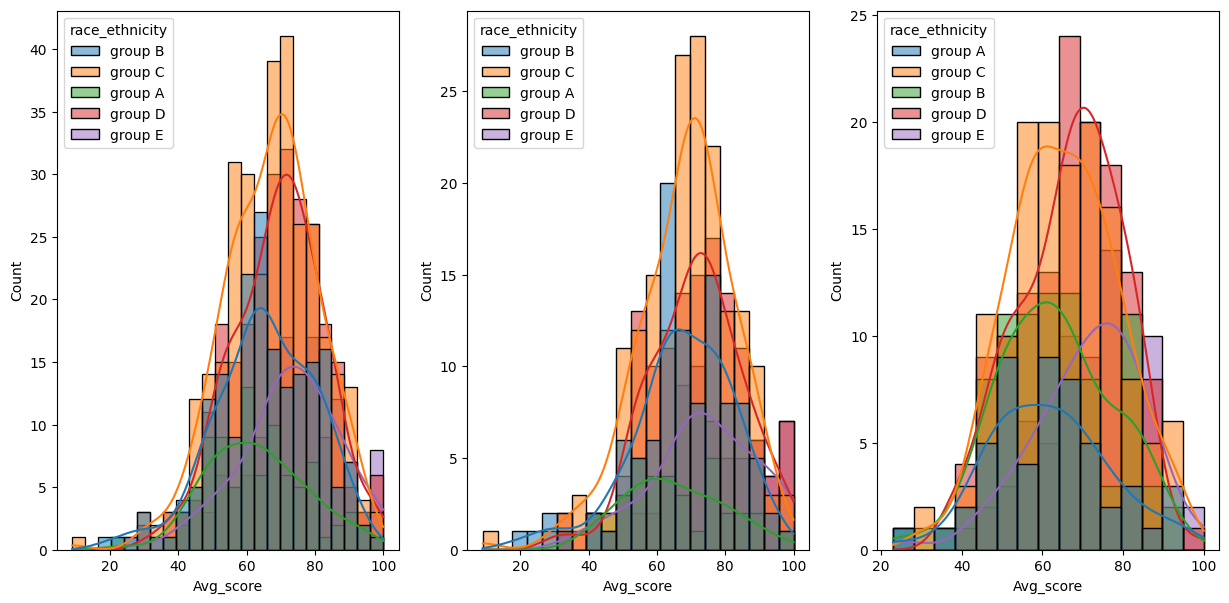

In [24]:
# Create subplots with 1 row and 3 columns
fig, axs= plt.subplots(1,3, figsize=(15,7))
sns.histplot(data=df, x='Avg_score',kde=True,hue='race_ethnicity',ax=axs[0])
sns.histplot(data=df[df.gender=='female'],x='Avg_score', kde=True, hue='race_ethnicity',ax=axs[1])
sns.histplot(data=df[df.gender=='male'],x='Avg_score', kde=True, hue='race_ethnicity',ax=axs[2])
plt.show()

Student of Group A and Group B perform poor

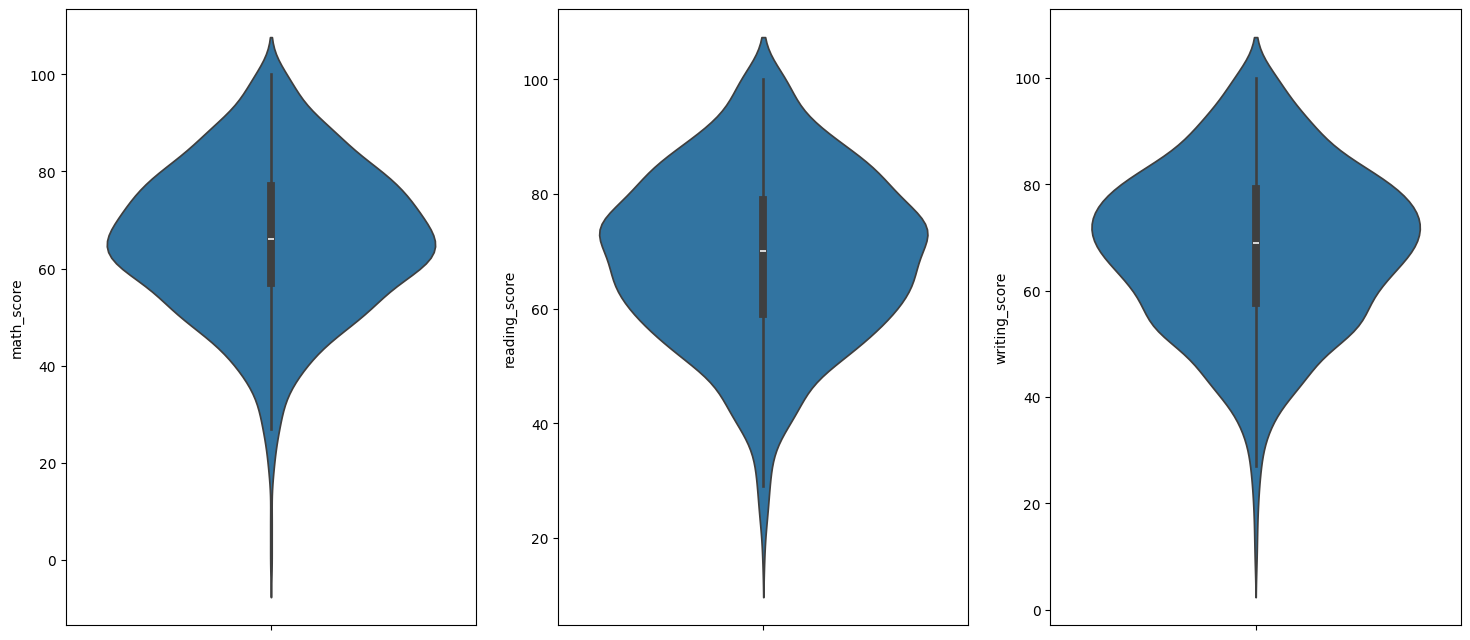

In [25]:
# Create subplots with 1 row and 2 columns
fig, axs= plt.subplots(1,3, figsize=(18,8))
sns.violinplot(data=df, y='math_score',ax=axs[0])
sns.violinplot(data=df,y='reading_score',ax=axs[1])
sns.violinplot(data=df,y='writing_score',ax=axs[2])
plt.show()

### MultiVariate Analysis Pieplot

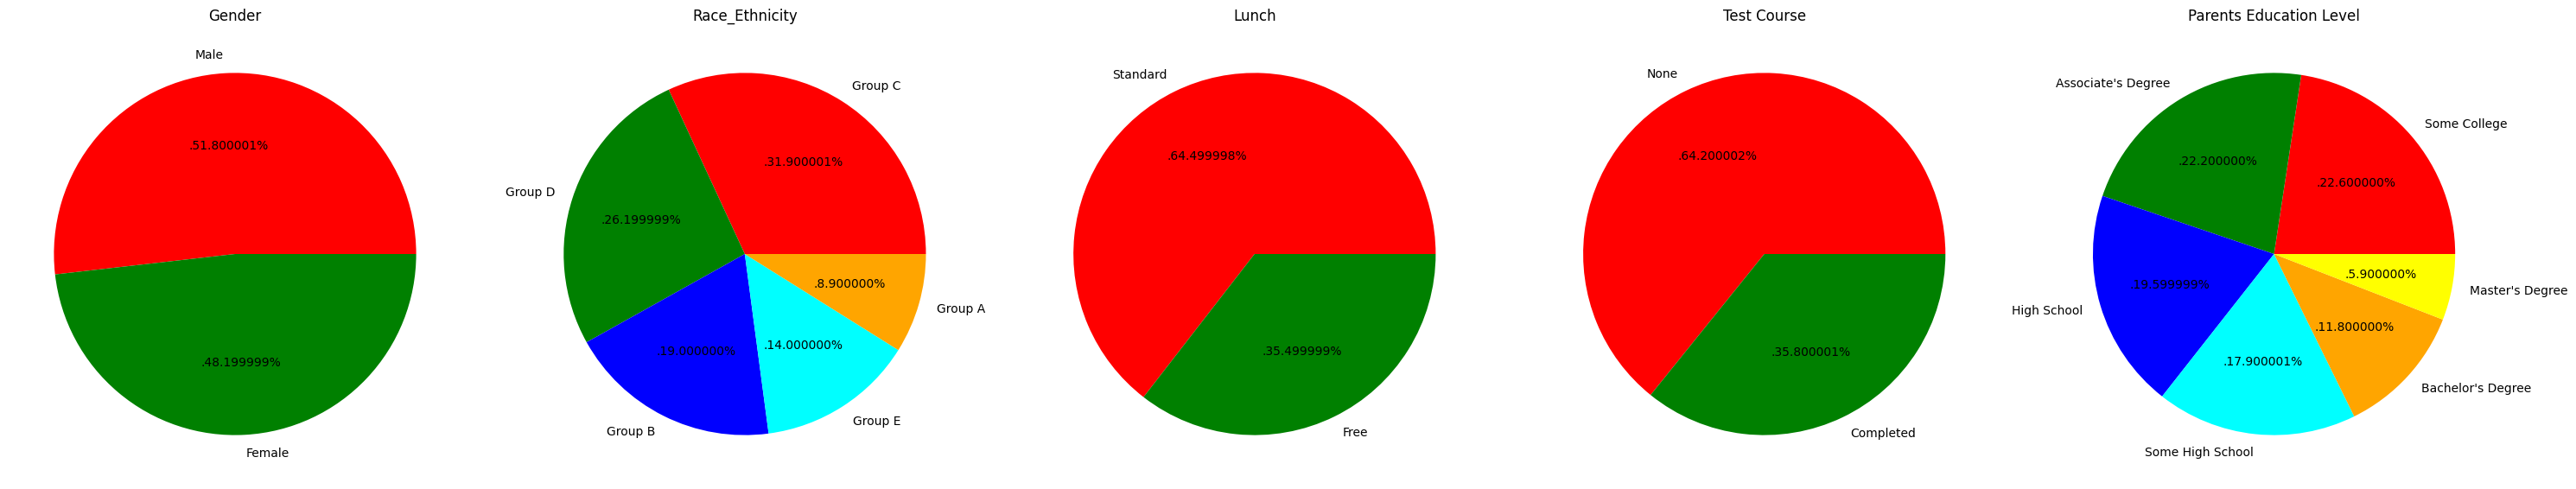

In [26]:
# plt.rcParams is a dictionary-like object in Matplotlib that allows you to configure global settings for plots.
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size= df['gender'].value_counts()
labels = 'Male','Female'
color = ['red','green']

plt.pie(size,labels=labels, colors=color, autopct='.%2f%%')
plt.title('Gender')
plt.axis('off')

plt.subplot(1,5,2)
size= df['race_ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,labels=labels, colors=color, autopct='.%2f%%')
plt.title('Race_Ethnicity')
plt.axis('off')

plt.subplot(1,5,3)
size= df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']

plt.pie(size,labels=labels, colors=color, autopct='.%2f%%')
plt.title('Lunch')
plt.axis('off')

plt.subplot(1,5,4)
size= df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = ['red','green']

plt.pie(size,labels=labels, colors=color, autopct='.%2f%%')
plt.title('Test Course')
plt.axis('off')

plt.subplot(1,5,5)
size= df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red','green','blue','cyan','orange','yellow']

plt.pie(size,labels=labels, colors=color, autopct='.%2f%%')
plt.title('Parents Education Level')
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

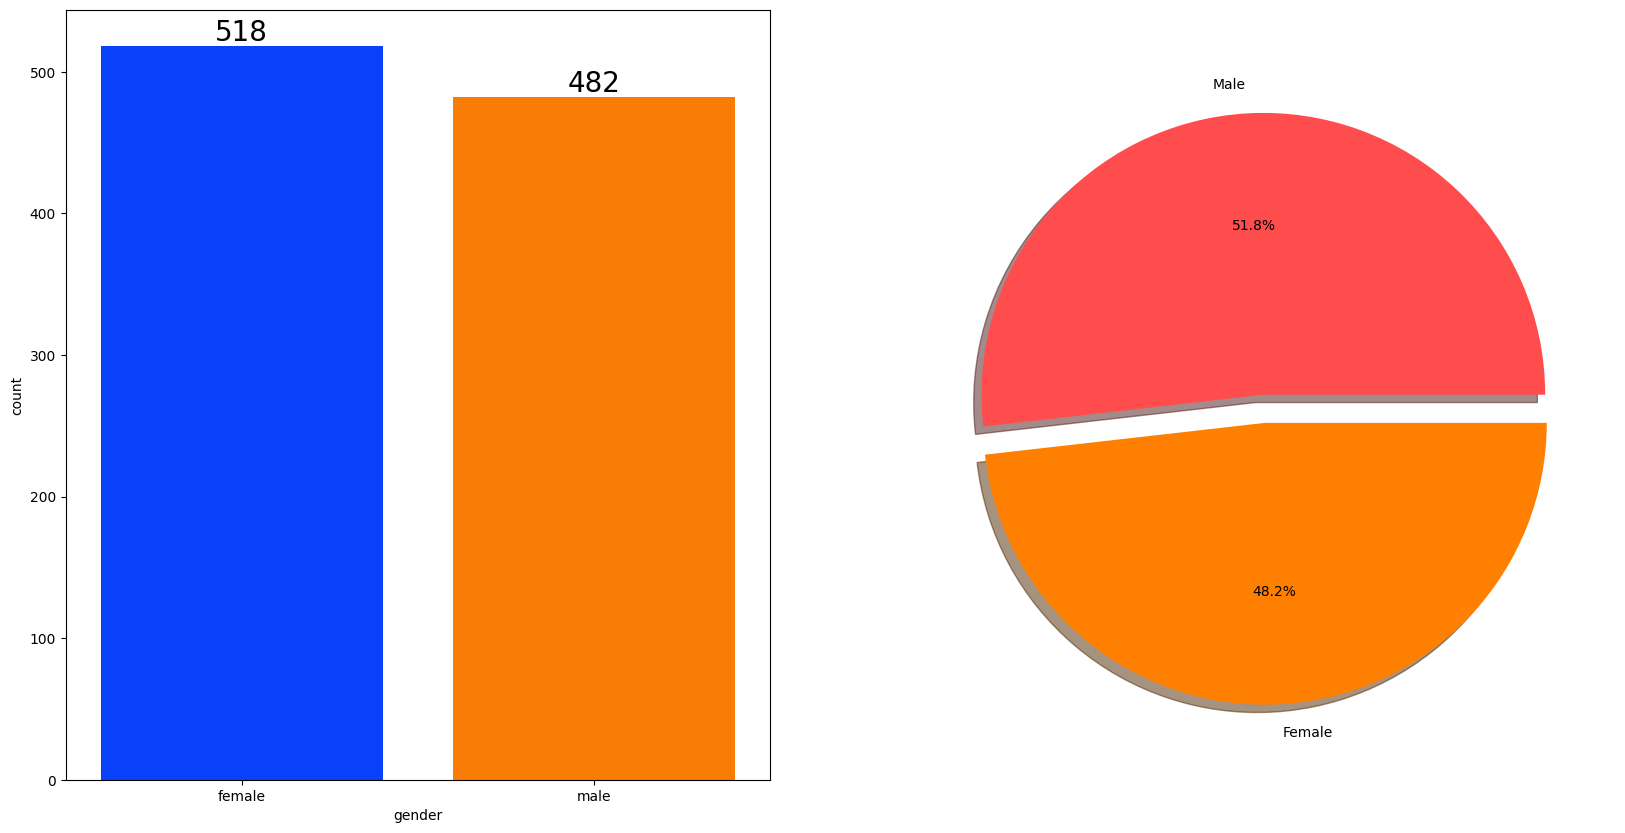

In [27]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot on the first axis (ax[0])
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
#ax[0].containers:
# Each bar in the countplot is represented as a "container" holding the bar's information.
# This retrieves all the bar containers in the plot. 

# bar_label() is a Matplotlib method used to add labels to bars.
# It places the count values on top of the corresponding bars.

# Pie chart on the second axis (ax[1])
ax[1].pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])

plt.show()

### BiVariate Analysis

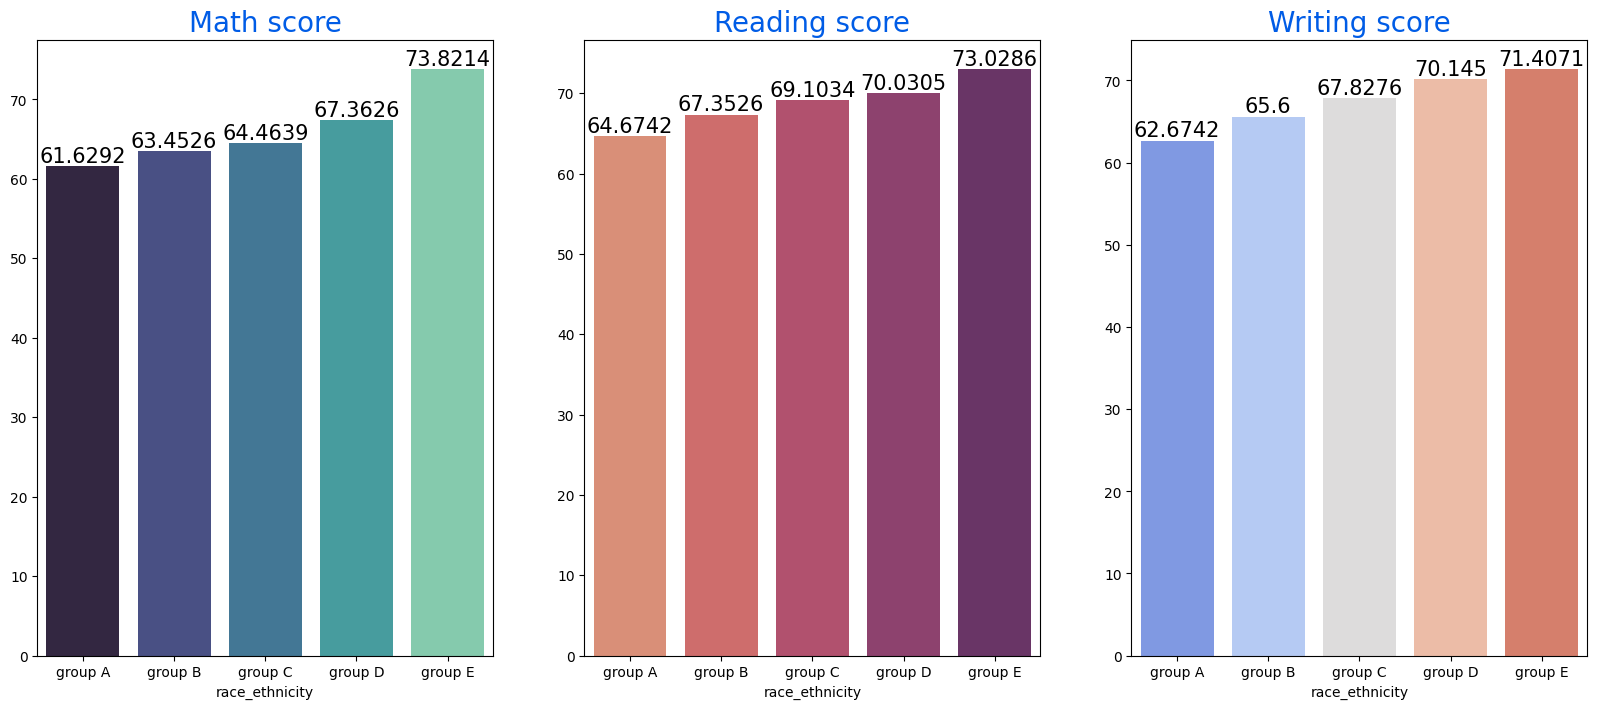

In [28]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a lower avg in all course subjects

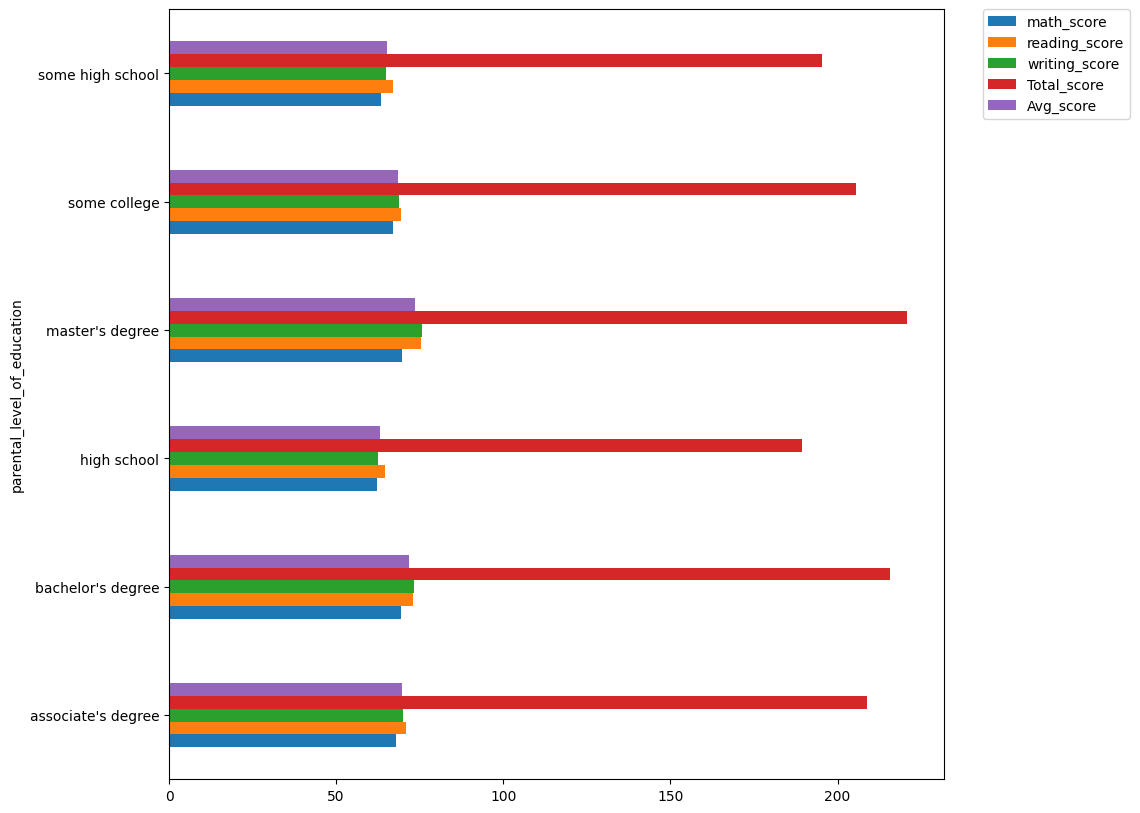

In [29]:
# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'parental level of education' and calculate the mean for each numeric column
df.groupby('parental_level_of_education')[numeric_columns].agg('mean').plot(kind='barh', figsize=(10, 10))
# plot(kind='barh', figsize=(10, 10)):
# Creates a horizontal bar plot with the calculated means. 


# Adjust legend position to prevent overlap
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


The score of student whose parents possess master and bachelor level education are higher than others.

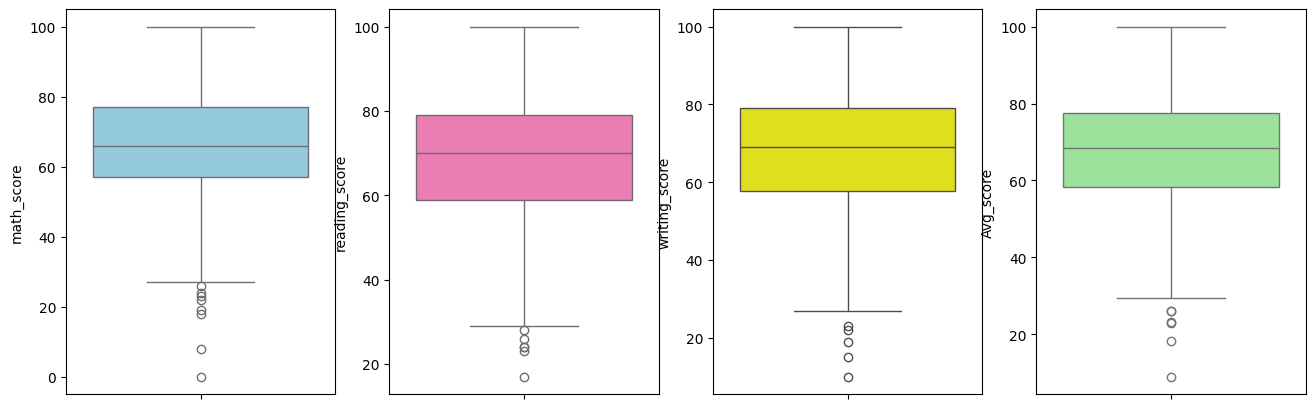

In [30]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Avg_score'],color='lightgreen')
plt.show()

### Multivariate Analysis

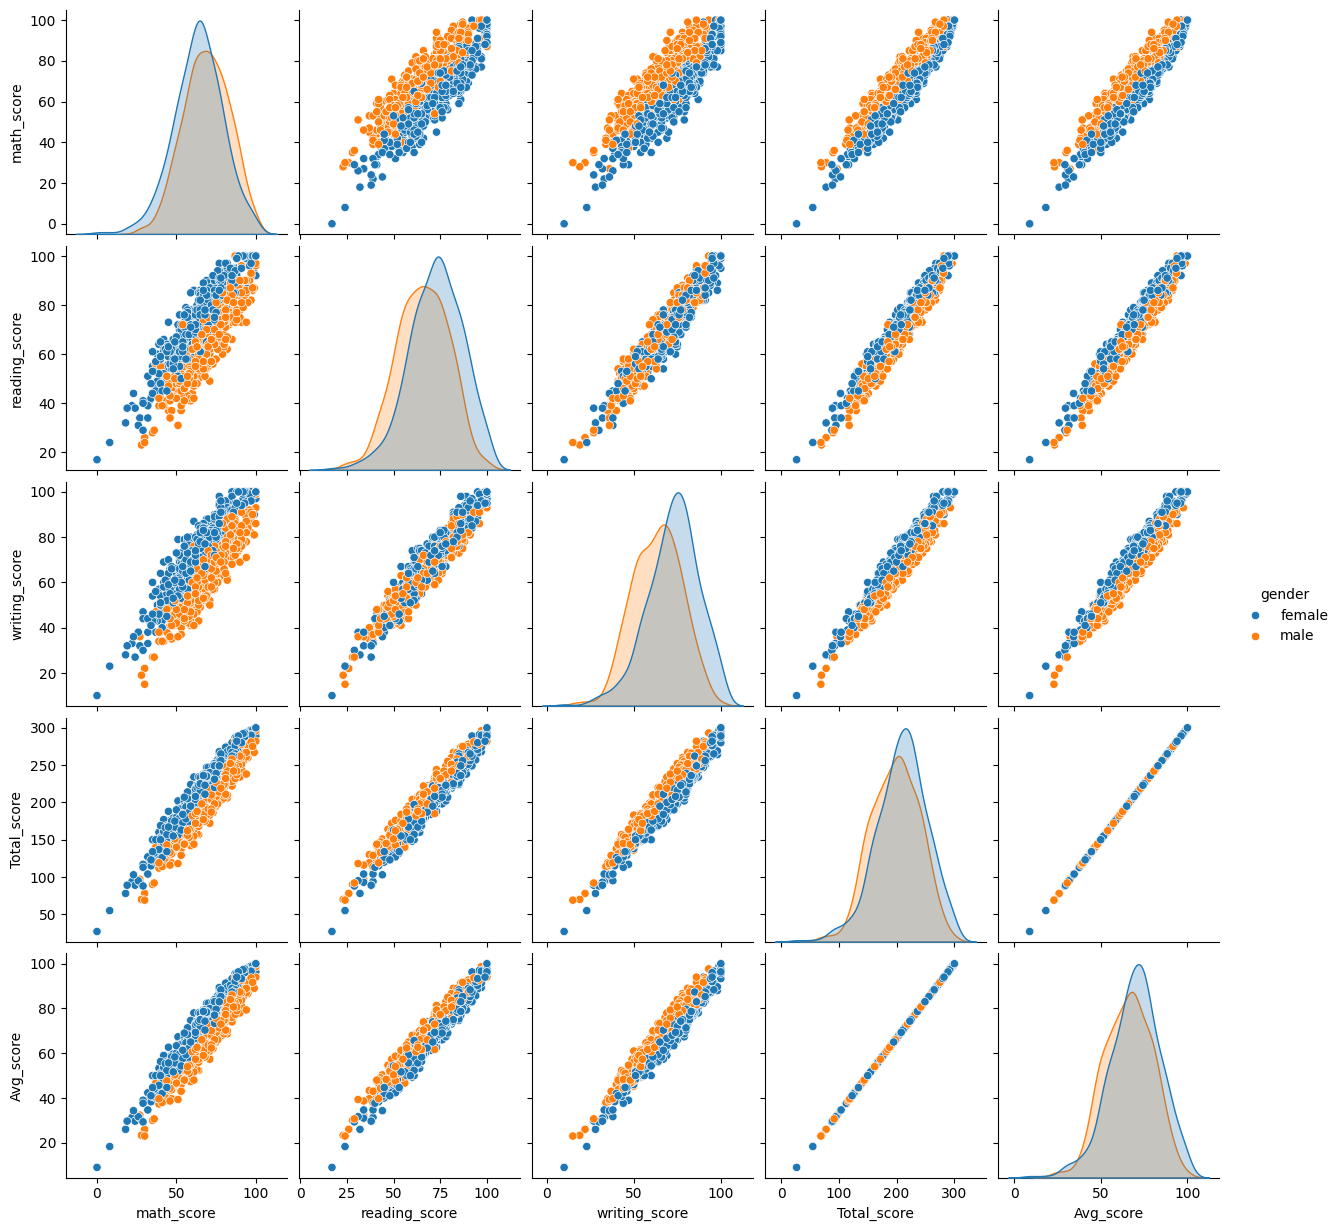

In [31]:
sns.pairplot(df,hue = 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.

1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.